In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

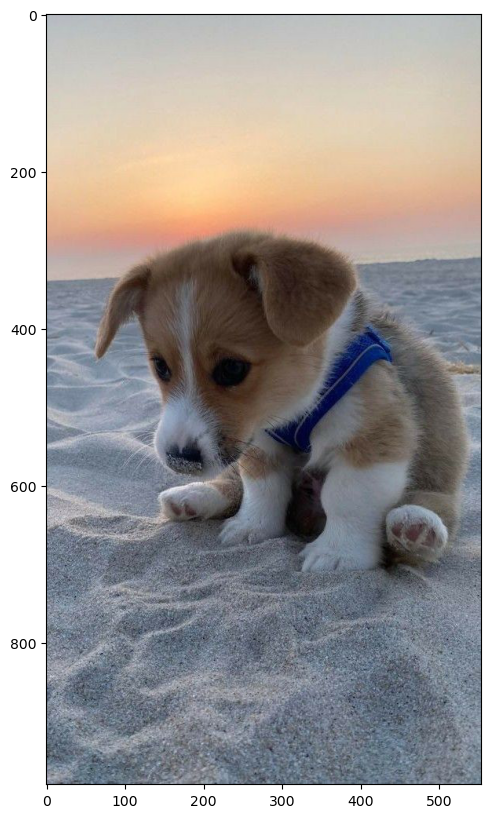

In [2]:
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (15, 15), 0)  # (15, 15) is the kernel size, 0 is the sigma value (auto-calculated)

In [4]:
# Create the difference image (original - unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.

img_float = img.astype(np.float32)
unsharp_float = unsharp.astype(np.float32)

diff = img_float - unsharp_float
diff_clipped = np.clip(diff, 0, 255)

diff_uint8 = diff.astype(np.uint8)

In [5]:
# Apply USM to get the resulting image using `sharpened = original + (original - unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 0.5  # This controls the intensity of sharpening
sharpened = img_float + diff * amount

sharpened_clipped = np.clip(sharpened, 0, 255) #take care of underflows/overflows

sharpened_uint8 = sharpened_clipped.astype(np.uint8)

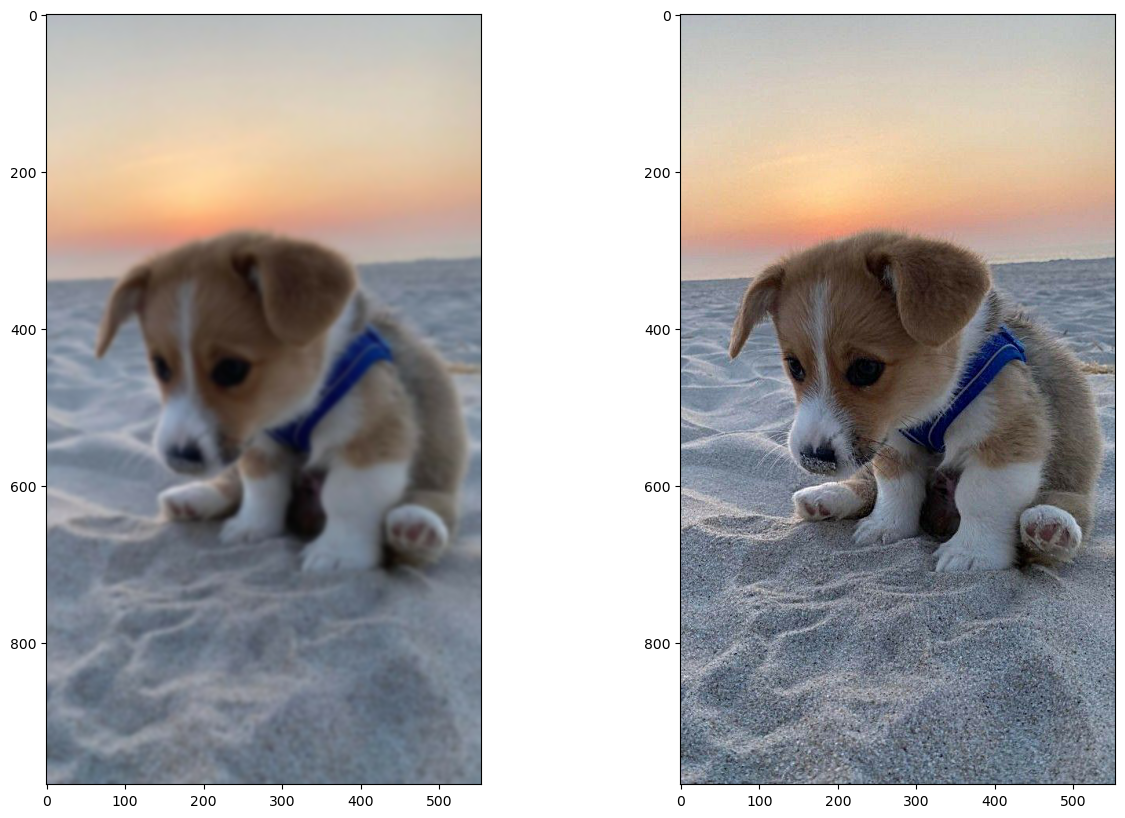

In [6]:
plt.subplot(121), plt.imshow(unsharp.astype(np.uint8))
plt.subplot(122), plt.imshow(sharpened_uint8)

plt.show()

Good (Reasonable) Value for amount:
A typical range is between 1.0 (baseline value) and 2.0.

If an amount is too small then we can barely see the effect of sharpening

if an amount is too large, the image looks unnatural, becomes noisy, and can appear artifacts. 
